# Load libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.datasets import cifar10

Using TensorFlow backend.


# Cifar10 Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 26s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


## Display some random images 

In [0]:
# Helper function to plot some images in the dataset
def plot_cifar10(class_name=None):
  mapping = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4,
            'dog': 5, 'fog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
  
  if class_name == None:
    fig, ax = plt.subplots(10, 10, sharey=True, figsize=(11,10))
    for j in range(10):
      class_index = (y_train == j)[:,0]
      class_imgs = x_train[class_index,:,:][np.random.choice(5000, 10),:,:]
      for i, img in enumerate(class_imgs):
        ax[j,i].imshow(img)
        ax[j,i].grid('off')
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])
        if i == 0:
          ax[j,i].set_ylabel(list(mapping.keys())[j])
  else:
    class_index = (y_train == mapping[class_name])[:,0]
    class_imgs = x_train[class_index,:,:][np.random.choice(5000, 10),:,:]
    fig, ax = plt.subplots(1, 10, sharey=True, figsize=(22,2))
    for i, img in enumerate(class_imgs):
      ax[i].imshow(img)
      ax[i].grid('off')
      ax[i].set_xticks([])
      ax[i].set_yticks([])
      if i == 0:
        ax[i].set_ylabel(class_name)
  

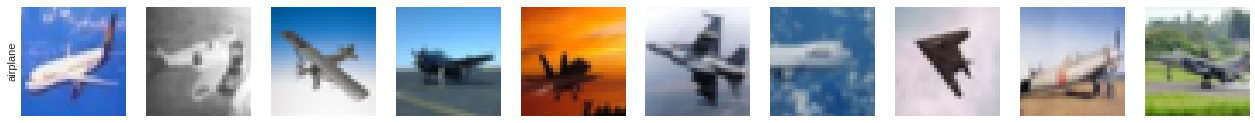

In [6]:
plot_cifar10('airplane')

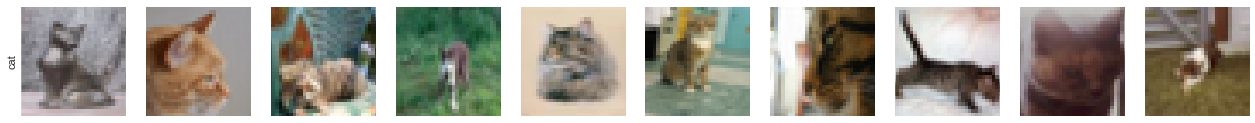

In [7]:
plot_cifar10('cat')

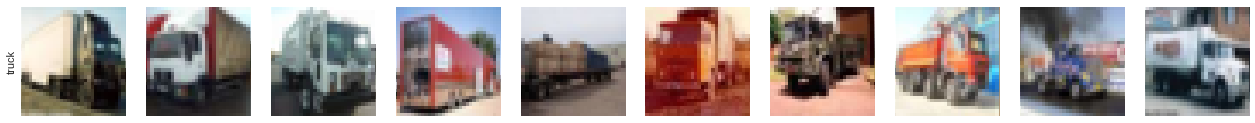

In [8]:
plot_cifar10('truck')

## Display 10 random images from each class

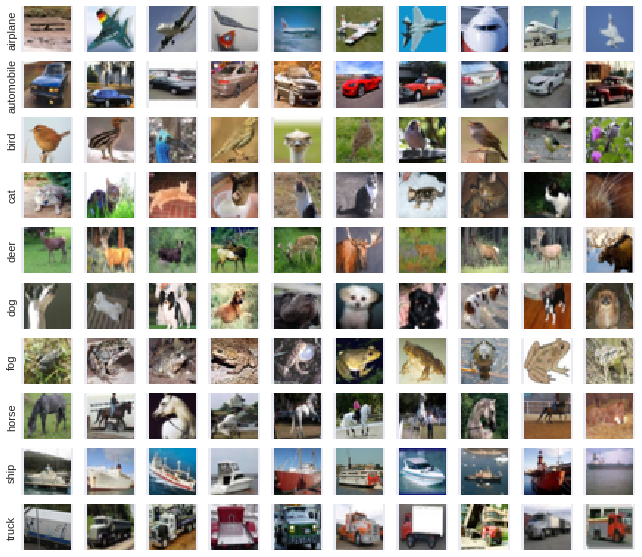

In [9]:
plot_cifar10()

# Train a two-layers neural network

In [0]:
# 2-layers NN
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=32 * 32 * 3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Configure the optimizer
adam = optimizers.Adam(lr=0.001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Preprocessing data 

In [0]:
# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Mean subtraction
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

# Convert labels to categorical one-hot encoding
train_labels = keras.utils.to_categorical(y_train, num_classes=10)
test_labels = keras.utils.to_categorical(y_test, num_classes=10)

# Reshape the train and test data into 1D vector
train_data = np.reshape(x_train, [x_train.shape[0], 32*32*3])
test_data = np.reshape(x_test, [x_test.shape[0], 32*32*3])

## Train and validate

In [13]:
history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels),
          epochs=20, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 69us/step - loss: 1.3795 - acc: 0.5163 - val_loss: 1.4187 - val_acc: 0.5003
Epoch 2/20
50000/50000 [==============================] - 4s 80us/step - loss: 1.3013 - acc: 0.5459 - val_loss: 1.3893 - val_acc: 0.5128
Epoch 3/20
50000/50000 [==============================] - 4s 80us/step - loss: 1.2396 - acc: 0.5671 - val_loss: 1.3795 - val_acc: 0.5147
Epoch 4/20
50000/50000 [==============================] - 4s 80us/step - loss: 1.1926 - acc: 0.5838 - val_loss: 1.3622 - val_acc: 0.5234
Epoch 5/20
50000/50000 [==============================] - 4s 79us/step - loss: 1.1449 - acc: 0.6023 - val_loss: 1.3632 - val_acc: 0.5244
Epoch 6/20
50000/50000 [==============================] - 4s 79us/step - loss: 1.1073 - acc: 0.6130 - val_loss: 1.3561 - val_acc: 0.5241
Epoch 7/20
50000/50000 [==============================] - 4s 80us/step - loss: 1.0655 - acc: 0.6294 - val_loss: 1.3604 - val_acc

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [15]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [16]:
len(history_dict['loss'])

20

In [0]:
epochs = range(1, 21)

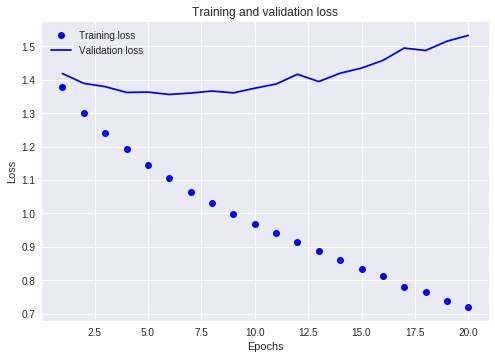

In [18]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

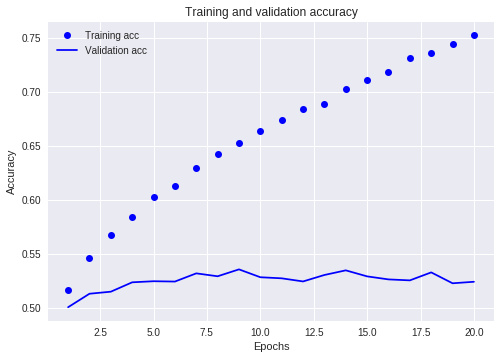

In [19]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

In [21]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                65600     
__________

In [0]:
# Configure the optimizer
adam = optimizers.Adam(lr=0.001)
cnn_model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])